# Data Collection

In [1]:
import pandas as pd

# Load datasets
sentiment140_data = pd.read_csv('new_train_data_s140.csv') 
# Replace with your actual dataset variable
sentiment140_data = pd.read_csv('new_train_data_s140.csv') 
trustpilot_reviews_data = pd.read_csv('trust_pilot_reviews_data_2022_06.csv') 
twitter_data = pd.read_csv('Twitter Scraping Tweets Dataset.csv')
reviews_data = pd.read_csv('Reviews.csv') 
ratings_beauty_data = pd.read_csv('ratings_beauty.csv')

# Function to display column names and first 2 rows
def display_columns_and_rows(df, df_name):
    print(f"\n--- {df_name} ---")
    print("Columns:", df.columns)
    print(df.head(2))

# Display for each dataset
display_columns_and_rows(sentiment140_data, 'Sentiment140 Dataset')
display_columns_and_rows(trustpilot_reviews_data, 'Trustpilot Reviews Dataset')
display_columns_and_rows(twitter_data, 'Twitter Data')
display_columns_and_rows(reviews_data, 'Reviews Dataset')
display_columns_and_rows(ratings_beauty_data, 'Ratings Beauty Dataset')


--- Sentiment140 Dataset ---
Columns: Index(['Polarity', 'Id', 'Date', 'Query', 'User', 'Text'], dtype='object')
   Polarity          Id                          Date     Query      User  \
0         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY  mattycus   
1         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   ElleCTF   

                                                Text  
0  @Kenichan I dived many times for the ball. Man...  
1    my whole body feels itchy and like its on fire   

--- Trustpilot Reviews Dataset ---
Columns: Index(['name', 'company_url', 'trustpilot_url', 'description', 'author_name',
       'review_title', 'review_text', 'rating', 'reviewed_at', 'uniq_id',
       'scraped_at'],
      dtype='object')
        name                 company_url  \
0  Poundshop  https://www.poundshop.com/   
1  Poundshop  https://www.poundshop.com/   

                                      trustpilot_url  \
0  https://uk.trustpilot.com/review/www.poundshop...   
1  

# Data Preprocessing
**Cleaning Text Data**

In [2]:
def preprocess_sentiment140(data):
    # Keep only the relevant columns (Polarity, Text)
    data = data[['Polarity', 'Text']]
    return data

sentiment140_preprocessed = preprocess_sentiment140(sentiment140_data)

In [3]:
def preprocess_trustpilot(data):
    # Keep the review text and rating, rename them for consistency
    data = data[['review_text', 'rating']]
    data.rename(columns={'review_text': 'Text', 'rating': 'Polarity'}, inplace=True)
    # Convert ratings to binary sentiment: 1 for positive (rating > 3), 0 for negative
    data['Polarity'] = data['Polarity'].apply(lambda x: 1 if x > 3 else 0)
    return data

trustpilot_preprocessed = preprocess_trustpilot(trustpilot_reviews_data)

C:\Users\Global\AppData\Local\Temp\ipykernel_3016\2218531339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'review_text': 'Text', 'rating': 'Polarity'}, inplace=True)
C:\Users\Global\AppData\Local\Temp\ipykernel_3016\2218531339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity'] = data['Polarity'].apply(lambda x: 1 if x > 3 else 0)


In [4]:
def preprocess_twitter(data):
    # Keep relevant columns: text (tweets) and label (sentiment)
    data = data[['text', 'label']]
    data.rename(columns={'text': 'Text', 'label': 'Polarity'}, inplace=True)
    return data

twitter_preprocessed = preprocess_twitter(twitter_data)

C:\Users\Global\AppData\Local\Temp\ipykernel_3016\2051554125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'text': 'Text', 'label': 'Polarity'}, inplace=True)


In [5]:
def preprocess_reviews(data):
    # Keep relevant columns: Text (review) and Score (for sentiment)
    data = data[['Text', 'Score']]
    # Convert Score to binary polarity (1 for positive, 0 for negative)
    data['Polarity'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)
    return data[['Polarity', 'Text']]  # Keep columns in consistent order

reviews_preprocessed = preprocess_reviews(reviews_data)

C:\Users\Global\AppData\Local\Temp\ipykernel_3016\1822199805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)


In [6]:
def preprocess_ratings_beauty(data):
    # Assume ratings are from 1 to 5, convert them to binary polarity (1 for positive, 0 for negative)
    data['Polarity'] = data['Rating'].apply(lambda x: 1 if x > 3 else 0)
    # In this case, we don't have review text, so we will skip text processing for this dataset
    return data[['Polarity']]

ratings_beauty_preprocessed = preprocess_ratings_beauty(ratings_beauty_data)

**Save the Preprocessed Datasets**

In [7]:
sentiment140_preprocessed.to_csv('sentiment140_preprocessed.csv', index=False)
trustpilot_preprocessed.to_csv('trustpilot_preprocessed.csv', index=False)
twitter_preprocessed.to_csv('twitter_preprocessed.csv', index=False)
reviews_preprocessed.to_csv('reviews_preprocessed.csv', index=False)
ratings_beauty_preprocessed.to_csv('ratings_beauty_preprocessed.csv', index=False)

**Combine the Preprocessed Data**

In [8]:
# Combine datasets (only those with text)
combined_data = pd.concat([
    sentiment140_preprocessed, 
    trustpilot_preprocessed, 
    twitter_preprocessed, 
    reviews_preprocessed
], ignore_index=True)

# Shuffle combined data
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
# Check the columns of the combined dataset
print(combined_data.columns)

Index(['Polarity', 'Text'], dtype='object')


# Handling Missing Values and Vectorization
**Vectorize the Text Data**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(combined_data['Text'])

# Labels for sentiment (Polarity)
y = combined_data['Polarity']

In [10]:
from sklearn.model_selection import train_test_split 

# Replace 'Polarity' with the appropriate column from your dataset
X = sentiment140_data['Text']  # The text data
y = sentiment140_data['Polarity']  # The target labels (e.g., sentiment polarity)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check for missing values in the target column
print(f'Missing values in y_train: {y_train.isnull().sum()}')

# Drop missing values if present
y_train_clean = y_train.dropna()
y_test_clean = y_test.dropna()

Missing values in y_train: 0


# Exploratory Data Analysis (EDA)
**Sentiment Distribution**

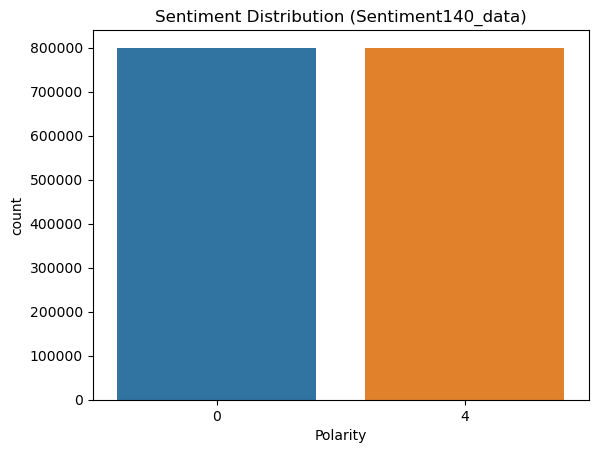

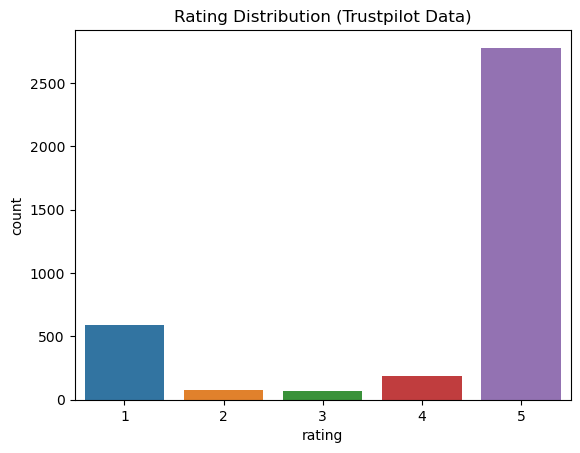

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution for Kaggle Sentiment140 dataset
sns.countplot(x='Polarity', data=sentiment140_data)
plt.title('Sentiment Distribution (Sentiment140_data)')
plt.show()

# Rating distribution for Trustpilot dataset
sns.countplot(x='rating', data=trustpilot_reviews_data)
plt.title('Rating Distribution (Trustpilot Data)')
plt.show()

**Correlations between Review Sentiment and Pricing Feedback**

In [12]:
# Convert Trustpilot ratings to sentiment polarity (1 for positive, 0 for negative)
trustpilot_reviews_data['Polarity'] = trustpilot_reviews_data['rating'].apply(lambda x: 1 if x > 3 else 0)

# Calculate correlation between Trustpilot ratings and sentiment polarity
correlation = trustpilot_reviews_data['rating'].corr(trustpilot_reviews_data['Polarity'])
print(f'Correlation between Trustpilot ratings and Polarity: {correlation}')

Correlation between Trustpilot ratings and Polarity: 0.9718712088751484


# Model Building
**Train-Test Split**

In [13]:
from sklearn.model_selection import train_test_split 

# Replace 'Polarity' with the appropriate column from your dataset
X = sentiment140_data['Text']  # The text data
y = sentiment140_data['Polarity']  # The target labels (e.g., sentiment polarity)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Vectorize Text Data**

In [14]:
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit on train data
X_test_tfidf = vectorizer.transform(X_test)  # Transform test data

**Model Training (Logistic Regression)**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_clean)

# Evaluate the model
lr_accuracy = lr.score(X_test_tfidf, y_test_clean)
print(f"Model Accuracy: {lr_accuracy:.2f}")

Model Accuracy: 0.80


C:\Users\Global\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Save the Model and Vectorizer

In [17]:
import joblib

# Save the trained model and vectorizer
joblib.dump(lr, 'sentiment_analysis_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

**Model Comparison**

In [18]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f'Naive Bayes Model Accuracy: {nb_accuracy}')

Naive Bayes Model Accuracy: 0.774134375


# Models Visualization

C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


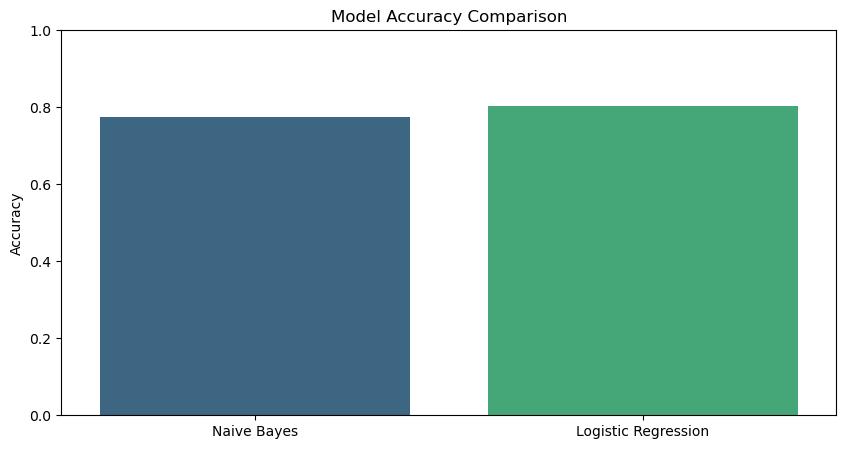

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Visualize Model Accuracies
model_names = ['Naive Bayes', 'Logistic Regression']
accuracies = [nb_accuracy, lr_accuracy]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

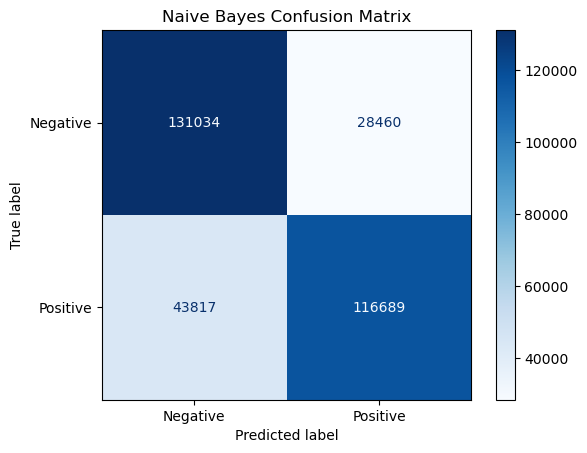

In [20]:
# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)
nb_cm_display = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=['Negative', 'Positive'])
nb_cm_display.plot(cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()